In [1]:
# import das libs necessarias

import pandas as pd # trabalhar com dataframes
import numpy as np # realizacao de algumas operacoes com matrizes

# ML
from sklearn.decomposition import PCA #PCA sklearn

#imagens
import cv2 # transformacoes faceis em imagens
from PIL import Image # trabalhar com imagens


# ferramentais
import glob # exploracao de diretorios
from pylab import *

# plot 
import matplotlib.pyplot as plt # plotagem
%matplotlib inline

## 1 - Explorando o dado

-- Para começar os trabalhos vamos explorar os dados
 - Nossos dados se tratam de imagens de gatos e cachorro retirados do dataset Dog vs Cat
 - Todas as imagens são de diferentes tamanhos variando de 42x42 ate 1050x768 apresentando uma media de 400x400
 - Temos 800MB de imagens já classificadas, porém algumas apresentam classificação incorreta e a base também apresenta algum ruído (fotos que não são nem gatos nem cachorros)

FileNotFoundError: [Errno 2] No such file or directory: '../data/train/cat.6.jpg'

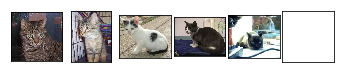

In [7]:
# Vamos iniciar olhando algumas das fotos presentes no dataset

# criamos o grid para o plot
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plotamos as figuras
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(Image.open('../data/train/cat.{}.jpg'.format(i+1)), cmap=plt.cm.bone, interpolation='nearest')

#mostramos o plot
plt.show()

Na imagem acima podemos notar novamente a diferença entre os tamanhos das figuras, além das diferenças claras de cores, brilhos e ângulo das imagens, o que dificulta bastante nossa tarefa.

Vamos olhas agora para uma única imagem randômica:

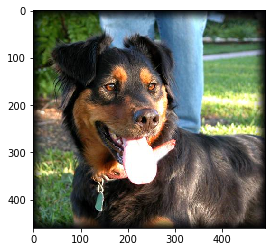

In [3]:
img = Image.open('data/test1/190.jpg')
plt.imshow(img)

In [4]:
# Print das dimensoes da imagem
img1 = np.asarray(img)
img1.shape

(460, 491, 3)

Podemos notar no print acima que a imagem no caso tem a dimensao de 460x491 e além disso tem 3 camadas de cores (RGB), para facilitar as etapas iniciais do nosso trabalho vamos transformar todas as imagens em escalas de cinza removendo a terceira dimensao latente

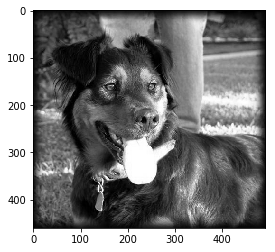

In [5]:
gray_img = Image.open('data/test1/190.jpg').convert('LA')
plt.imshow(gray_img)

In [6]:
img = Image.open('data/test1/190.jpg').convert("L")
imgarr = np.array(img) 
imgarr.shape

(460, 491)

Ao transformar uma imagem em tons de cinza removemos as 3 dimensoes de cores existentes deixando apenas uma,  o que facilita o entendimento do dado como uma matriz de pixels

---

## 2 - Pré processamento

Para realizacao desta etapa do trabalho fizemos os seguintes passos:
- Redimensionamos todas as imagens do dataset usado para a média dos tamanhos (400x400)
- Trocamos todos para a escala de cor cinza afim de facilitar nosso trabalho
- Para cada imagem, transformamos ela em uma linha de uma matriz contemdo 160.000 colunas (400x400)

In [10]:
# Para todas as imagens do diretorio
imagePaths = glob.glob("data/sample/*")
# Setamos o tamnho default novo para cada imagem
IMG_SIZE = 400
# Vamos armazenar cada matriz em uma matriz de matrizes X
X = []
for img in imagePaths:
    # Imagens para escala de cinza
    img_data = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
    # Resizing das imagens para 400x400
    img_data = cv2.resize(img_data, (IMG_SIZE, IMG_SIZE))
    # Adicionamos na matriz X
    X.append([np.array(img_data)])

In [11]:
# Para a matriz X que é uma matriz de matrizes vamos expandir cada submatriz transformando-as
# em uma linha da matriz X_train (flatten) isso nos retornara uma matriz
# com dimensoes NUMERO_DE_IMAGENS x NUMERO_DE_PIXELS_EM_CADA_IMG
X_train = np.array([i[0] for i in X]).reshape(-1, IMG_SIZE, IMG_SIZE)
X_train = np.array([i.flatten() for i in X_train])

In [12]:
df = pd.DataFrame(X_train)
df.shape

(1001, 160000)

Acima vemos que a nova dimensão da matriz X_Train tem as dimensoes esperadas para 1001 imagens de 400x400 pixels cada uma, tornando-se 160000 colunas (pixels alinhados). Abaixo podemos ver um exemplo do começo dessa matriz

In [13]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,159990,159991,159992,159993,159994,159995,159996,159997,159998,159999
0,130,130,130,130,130,129,129,129,128,128,...,67,72,74,75,75,76,76,76,76,76
1,77,48,23,10,21,45,92,89,83,78,...,175,183,198,201,197,199,189,178,180,185
2,65,73,81,71,89,67,66,77,68,71,...,46,51,61,73,66,48,54,58,74,84
3,2,2,3,3,4,4,6,8,9,11,...,157,155,151,148,144,142,140,130,129,135
4,137,138,138,138,139,140,141,142,143,148,...,79,75,77,81,83,82,83,91,104,118


## 3 - PCA

Agora com todo o pré-processamento feito e a matriz X_train pronta para a aplicação do algoritmo podemos iniciar a aplicação do PCA

In [14]:
# Definimos quantas componentes gostariamos de utilizar 
pca_img = PCA(64)

# Fitamos o PCA e aplicamos a matriz X_train
pca_img.fit(X_train)
gray_img_pca = pca_img.fit_transform(X_train)

In [15]:
gray_img_pca.shape

(1001, 64)

Acima podemos ver o novo formato dos dados, com as componentes principais encontradas pelo PCA. Na célula inferior plotamos a soma das componentes principais mostrando o quanto de variancia foi explicada pelo número de componentes especificado

[ 0.20786658  0.32523649  0.3996665   0.4583149   0.49027964  0.51805053
  0.54217616  0.56120155  0.58014895  0.59521898  0.60872867  0.62083665
  0.63090682  0.64049721  0.64926139  0.65783564  0.66555389  0.67310104
  0.67979719  0.68637795  0.69207738  0.69759682  0.70268511  0.70771868
  0.7126217   0.71709335  0.72136809  0.72543848  0.72933483  0.73310428
  0.73684295  0.74035067  0.74372536  0.74690629  0.74992644  0.75292687
  0.75578316  0.75857373  0.76129876  0.76394681  0.76655188  0.76899458
  0.77141227  0.77373937  0.77599274  0.77821416  0.78037734  0.78249554
  0.78453546  0.78657417  0.78854448  0.79041135  0.79222722  0.79403214
  0.79580194  0.79756792  0.79929927  0.80098678  0.80265975  0.80427846
  0.80586335  0.80743366  0.80896962  0.81048577]


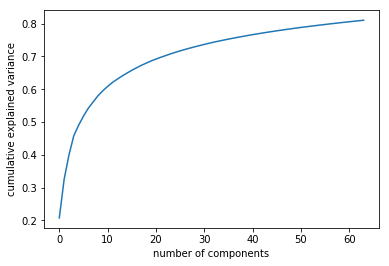

In [16]:
plt.plot(np.cumsum(pca_img.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
print(np.cumsum(pca_img.explained_variance_ratio_))

Para o número de componentes especificados chegamos a um total de 81% da variância explicada.

Agora que sabemos que redimensionando as imagens originais para o numero de compononentes principais escolhidas manteve 81% de variação podemos tentar mostrar o que as melhores componentes significam. Isso não é uma tentativa de reconstrução da imagem, é apenas uma visualização das componentes principais, o parametro `components_` nos permite acessar os componentes que apresentaram maior significância.
Vamos tentar mostrar os 10 primeiros componentes:

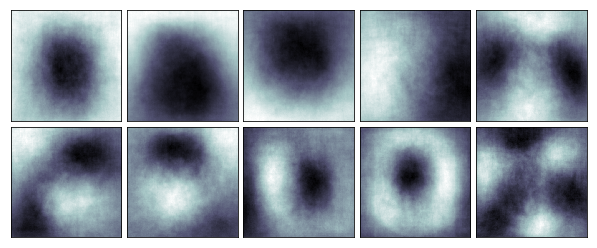

In [17]:
# Preparamos o grid para plotagem
fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
# Realizamos o plot
for i in range(10):
    ax = fig.add_subplot(5, 5, i+1, xticks=[], yticks=[])
    # plot dos principais componentes
    ax.imshow(np.reshape(pca_img.components_[i,:], (400,400)), cmap=plt.cm.bone, interpolation='nearest') 

Acima vemos que os principais componentes do sample de imagens não nos da uma visão muito clara do que está acontecendo. Se todas as imagens tivessem por exemplo o mesmo ângulo seria bem provavel que vissimos formas mais aproximadas de gatos e cachorros, mas a diferença de angulo, cor e brilho atrapalha um pouco a visualização das componentes, mesmo assim podemos notar algumas semelhanças com animais em algumas imagens

In [18]:
# Vamos tentar agora reconstruir uma imagem reduzida
# uma vez que reduzimos o tamanho de cada imagem para o numero de componetes principais
# vamos analisar o que acontece se expandirmos de volta, apenas dando um reshape sem reconstruir de fato
# a imagem
X_inv_proj = pca_img.inverse_transform(gray_img_pca)
X_proj_img = np.reshape(X_inv_proj,(1001,400,400))

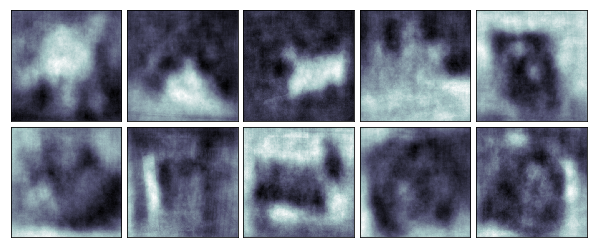

In [19]:
# plotando a imagem reconstruida com o pca
fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(10):
    ax = fig.add_subplot(5, 5, i+1, xticks=[], yticks=[])
    ax.imshow(X_proj_img[i], cmap=plt.cm.bone, interpolation='nearest')